In [28]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve

In [29]:
x, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)
    # 改变数据类型
y = y.astype(int)
    # 训练，测试数据分类
x_te, x_temp, y_te, y_temp = train_test_split(x, y, test_size=0.8, shuffle=True)
x_tr, x_va, y_tr, y_va = train_test_split(x_temp, y_temp, test_size=0.25, shuffle=True)

# print(x_val.shape,x_tr.shape,x_te.shape)

# 数据规范化
scaler = StandardScaler()
scaler.fit(x_tr)
trans_x_va = scaler.transform(x_va)
trans_x_tr = scaler.transform(x_tr)
trans_x_te = scaler.transform(x_te)

In [60]:
trans_x_va.shape

(14000, 784)

In [30]:
fnn = MLPClassifier(activation = "relu",learning_rate = "invscaling",hidden_layer_sizes = (400, 200,100,50,))

In [31]:
lm = LogisticRegression(solver = 'newton-cg',C=10, max_iter=10, penalty= 'l2')

In [32]:
rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 2, max_features = "log2", max_depth = 100, criterion = "log_loss")

In [33]:
knn = KNeighborsClassifier(n_neighbors=10) 

In [35]:
clf_list = [fnn,lm,rf,knn]

In [36]:
small_sample_size = 3000
repeat_time = 5

In [37]:
N = len(clf_list)
train_size = [500,1500,3000,5000,10000,20000,30000,42000]
train_acc = [[] for n in range(N)]
va_acc = [[] for n in range(N)]
te_acc = [[] for n in range(N)]

In [38]:
import random

In [39]:
for size in train_size:
    print(size)
    #检查样本size是否太小
    if size < small_sample_size:
        random_index = [random.randint(0,trans_x_tr.shape[0] - size) for temp in range(repeat_time)]
        for index in range(len(clf_list)):
            tr_mean = 0
            va_mean = 0
            te_mean = 0
            #fit mutiple times to get a reliable number
            for r_index in random_index:
                #fit random subsample
                clf_list[index].fit(trans_x_tr[r_index:r_index+size],y_tr[r_index:r_index+size])
                #update mean_acc
                tr_mean += clf_list[index].score(trans_x_tr[r_index:
                                                            r_index+size],y_tr[r_index:r_index+size])
                va_mean += clf_list[index].score(trans_x_va,y_va)
                te_mean += clf_list[index].score(trans_x_te,y_te)
                
            train_acc[index].append(tr_mean/repeat_time)
            va_acc[index].append(va_mean/repeat_time)
            te_acc[index].append(te_mean/repeat_time)

    else:
        random_index = random.randint(0,trans_x_tr.shape[0] - size)
        for index in range(len(clf_list)):
            #fit the model
            clf_list[index].fit(trans_x_tr[random_index:random_index+size],y_tr[random_index:random_index+size])
            #get_acc
            train_acc[index].append(clf_list[index].score(trans_x_tr[random_index:random_index+size],
                                                          y_tr[random_index:random_index+size]))
            va_acc[index].append(clf_list[index].score(trans_x_va,y_va))
            te_acc[index].append(clf_list[index].score(trans_x_te,y_te))
            

500


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


1500


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


3000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


5000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


10000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


20000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


30000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


42000


/Users/yizhihensaodezhu/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [40]:
for i in va_acc:
    print(i)

[0.7875285714285715, 0.8258571428571427, 0.8467142857142858, 0.851, 0.8735714285714286, 0.8764285714285714, 0.8847857142857143, 0.8918571428571429]
[0.7764857142857142, 0.7886857142857143, 0.7952142857142858, 0.7786428571428572, 0.8292857142857143, 0.8428571428571429, 0.8365714285714285, 0.849]
[0.7760142857142858, 0.8122428571428572, 0.8311428571428572, 0.8384285714285714, 0.8522857142857143, 0.862, 0.8677142857142857, 0.8717142857142857]
[0.7189428571428571, 0.7687714285714286, 0.7923571428571429, 0.8075714285714286, 0.8241428571428572, 0.8356428571428571, 0.8457857142857143, 0.8508571428571429]


In [41]:
for i in train_acc:
    print(i)

[1.0, 1.0, 1.0, 0.996, 1.0, 0.99725, 0.9954333333333333, 0.9941904761904762]
[1.0, 1.0, 1.0, 0.9856, 0.9238, 0.89615, 0.8974, 0.8816666666666667]
[0.9724, 0.9774666666666667, 0.9793333333333333, 0.9798, 0.9822, 0.98235, 0.9831666666666666, 0.9832857142857143]
[0.7615999999999999, 0.8074666666666668, 0.8266666666666667, 0.833, 0.8522, 0.86515, 0.8685333333333334, 0.8745952380952381]


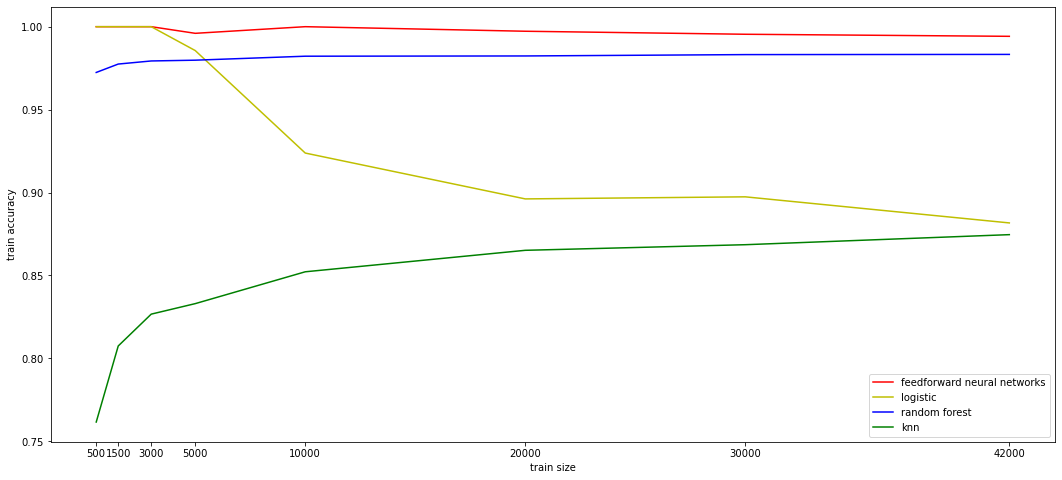

In [57]:
#clf_list = [fnn,lm,rf,knn]
fig,axes = plt.subplots(figsize = (18,8))
axes.set_xlabel("train size")
axes.set_ylabel("train accuracy")
axes.plot(train_size,train_acc[0],"r-",label = "feedforward neural networks")
axes.plot(train_size,train_acc[1],"y-",label = "logistic")
axes.plot(train_size,train_acc[2],"b-",label = "random forest")
axes.plot(train_size,train_acc[3],"g-",label = "knn")
axes.set_xticks(train_size)
axes.legend()

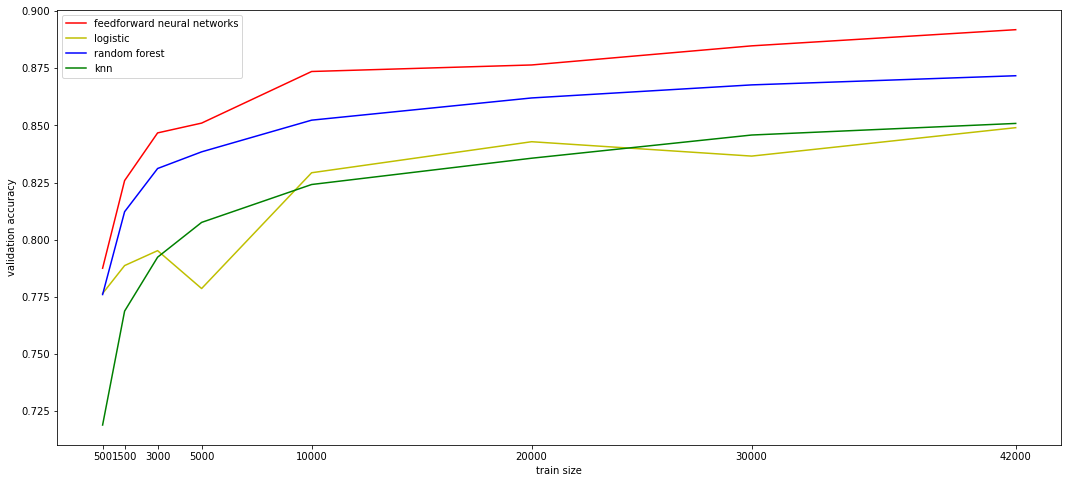

In [58]:
fig,axes = plt.subplots(figsize = (18,8))
axes.set_xlabel("train size")
axes.set_ylabel("validation accuracy")
axes.plot(train_size,va_acc[0],"r-",label = "feedforward neural networks")
axes.plot(train_size,va_acc[1],"y-",label = "logistic")
axes.plot(train_size,va_acc[2],"b-",label = "random forest")
axes.plot(train_size,va_acc[3],"g-",label = "knn")
axes.set_xticks(train_size)
axes.legend()

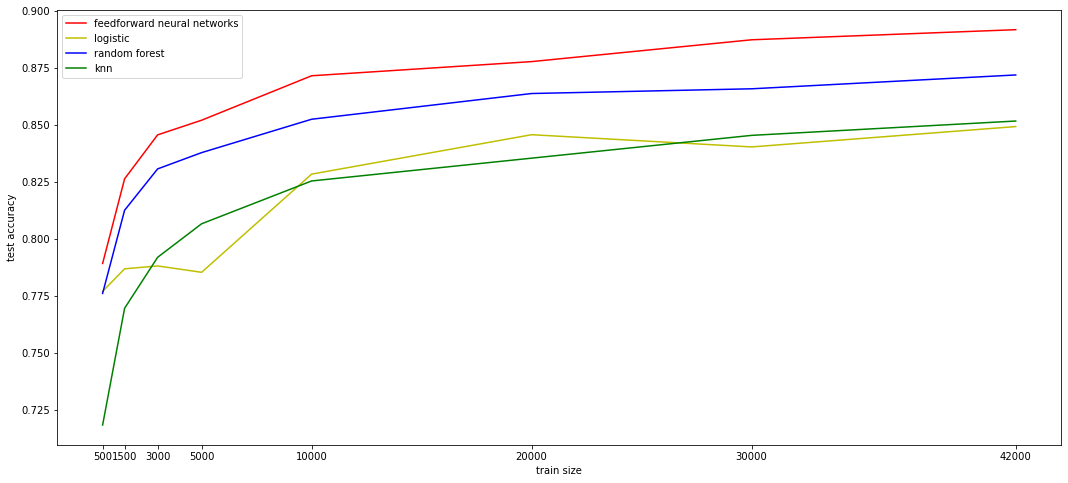

In [59]:
fig,axes = plt.subplots(figsize = (18,8))
axes.set_xlabel("train size")
axes.set_ylabel("test accuracy")
axes.plot(train_size,te_acc[0],"r-",label = "feedforward neural networks")
axes.plot(train_size,te_acc[1],"y-",label = "logistic")
axes.plot(train_size,te_acc[2],"b-",label = "random forest")
axes.plot(train_size,te_acc[3],"g-",label = "knn")
axes.set_xticks(train_size)
axes.legend()

In [61]:
train_acc - te_acc

TypeError: unsupported operand type(s) for -: 'list' and 'list'